<a href="https://colab.research.google.com/github/abhishek2828/ML-Projects/blob/main/ML_Project_1_Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
from matplotlib.widgets import Button
import ipywidgets as widgets
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
house_price_dataset = sklearn.datasets.fetch_california_housing()
#house_price_dataset = np.array(house_price_dataset)
print ((house_price_dataset))

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
# Loading teh dataset to a pandas dataframe
house_prices = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names) # columns includes the name of all the features names
print(house_prices)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]


In [4]:
#Adding the price column to the dataframe
house_prices['Prices'] = house_price_dataset.target
print(house_prices)

       MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  Prices
0      8.3252      41.0  6.984127  ...     37.88    -122.23   4.526
1      8.3014      21.0  6.238137  ...     37.86    -122.22   3.585
2      7.2574      52.0  8.288136  ...     37.85    -122.24   3.521
3      5.6431      52.0  5.817352  ...     37.85    -122.25   3.413
4      3.8462      52.0  6.281853  ...     37.85    -122.25   3.422
...       ...       ...       ...  ...       ...        ...     ...
20635  1.5603      25.0  5.045455  ...     39.48    -121.09   0.781
20636  2.5568      18.0  6.114035  ...     39.49    -121.21   0.771
20637  1.7000      17.0  5.205543  ...     39.43    -121.22   0.923
20638  1.8672      18.0  5.329513  ...     39.43    -121.32   0.847
20639  2.3886      16.0  5.254717  ...     39.37    -121.24   0.894

[20640 rows x 9 columns]


In [5]:
#To check the Rows and Columns in our table. (Rows, Columns)
print(house_prices.shape)

(20640, 9)


In [6]:
#To check if there are any missing values in each column
house_prices.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Prices        0
dtype: int64

In [7]:
#statistical values of the dataset
house_prices.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


The following Codes below are to understand the correlation in the data set

  1. Positive Correlation
  2. Negative Correlation

<Axes: >

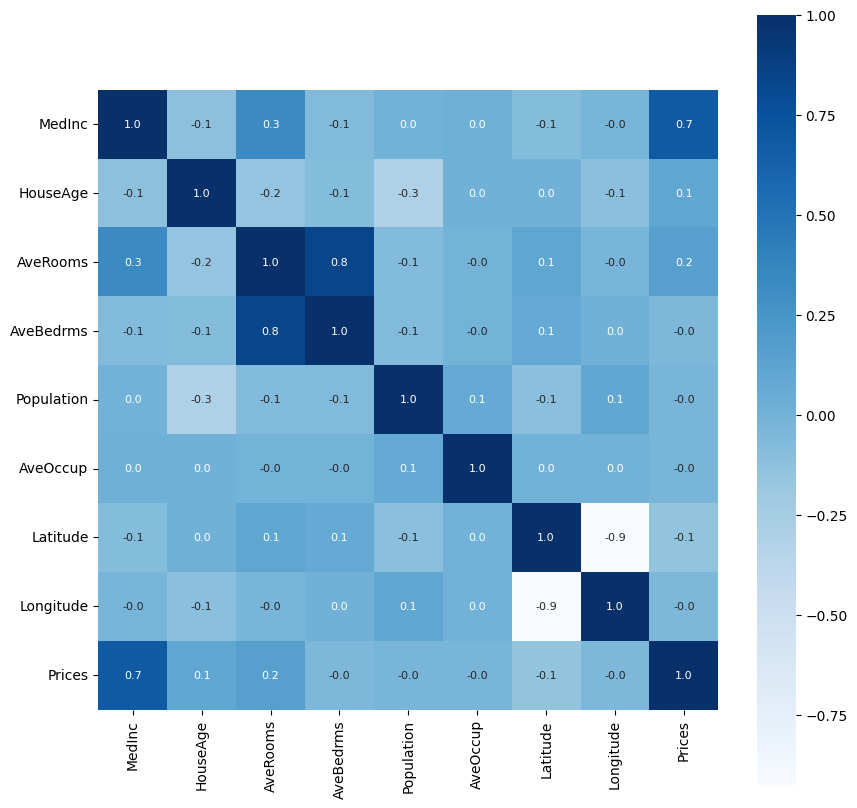

In [8]:
correlation = house_prices.corr()
#plotting the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f' , annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Splitting the Data and the Target

In [9]:
X = house_prices.drop(['Prices'], axis = 1) #When dropping a column, axis = 1, and when dropping a row, axis = 0
Y = house_prices['Prices']
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

Splitting the data into Training Set and Test Data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
#test_size = 0.2 means 20 Percent will be in the test data, while rest are in the training data


In [11]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Training our model

In [44]:

model = Sequential([
    Dense(units = 14, activation = 'relu'),
    Dense(units = 50, activation = 'relu'),
    Dense(units = 1)
                  ])
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005), loss = 'mse') #gradient descent with loss being mean squared error
model.fit(X_train, Y_train, epochs = 200)



Epoch 1/200
516/516 [==============================] - 2s 2ms/step - loss: 59.4338
Epoch 2/200
516/516 [==============================] - 1s 2ms/step - loss: 2.6898
Epoch 3/200
516/516 [==============================] - 1s 2ms/step - loss: 5.9107
Epoch 4/200
516/516 [==============================] - 1s 2ms/step - loss: 1.1393
Epoch 5/200
516/516 [==============================] - 1s 2ms/step - loss: 1.0655
Epoch 6/200
516/516 [==============================] - 1s 2ms/step - loss: 4.8895
Epoch 7/200
516/516 [==============================] - 1s 2ms/step - loss: 0.9581
Epoch 8/200
516/516 [==============================] - 1s 2ms/step - loss: 1.3988
Epoch 9/200
516/516 [==============================] - 1s 3ms/step - loss: 7.4433
Epoch 10/200
516/516 [==============================] - 2s 3ms/step - loss: 0.8234
Epoch 11/200
516/516 [==============================] - 1s 2ms/step - loss: 5.1259
Epoch 12/200
516/516 [==============================] - 1s 2ms/step - loss: 1.4535
Epoch 13/200

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
#predictions = model.predict(X_test)
predictions = model.predict(X_test)

print(predictions)
# Calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")



129/129 [==============================] - 0s 3ms/step
[[2.9537995]
 [1.5958875]
 [0.8315004]
 ...
 [1.2205248]
 [0.9911343]
 [2.5474842]]
Mean Squared Error: 0.5000286019336551
Mean Absolute Error: 0.5281199876859145


Visualizing the Predicted and Actual Prices

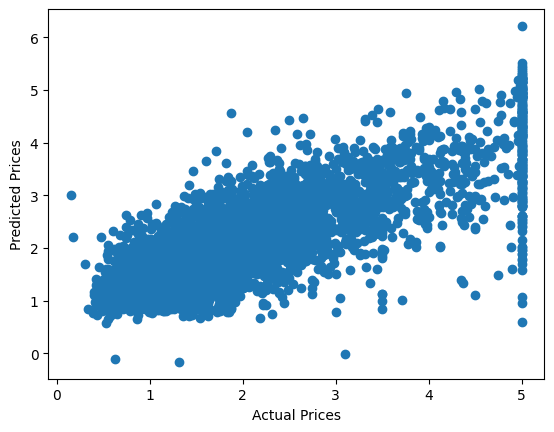

In [46]:
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()